In [1]:
import logging as lg
from pathlib import Path
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
verbose=True
BATCH_SIZE=100
VALID_RATE=0.3

RESULT_DIR=Path(f"result/mnist_{BATCH_SIZE}_{VALID_RATE}")
if verbose:
    lg.getLogger().setLevel(lg.INFO)
    lg.info("Verbose mode activated")

INFO:root:Verbose mode activated


In [3]:
def reshape_mnist_mlp(x,y):
    sample_num=x.shape[0]
    x=x.reshape(sample_num, -1)
    x= x.astype('float32')
    x /= 255
    y = to_categorical(y, 10)
    return x,y

In [4]:
from sklearn.model_selection import train_test_split
(x_train_val, y_train_val), (x_test, y_test) = mnist.load_data()

x_train_val,y_train_val=reshape_mnist_mlp(x_train_val,y_train_val)
X_test,y_test=reshape_mnist_mlp(x_test,y_test)

X_train, X_valid, y_train, y_valid = train_test_split(x_train_val, y_train_val, test_size=VALID_RATE)


In [5]:
X_train.shape,y_train.shape

((42000, 784), (42000, 10))

In [6]:
from keras.layers import Input, Dense,Add
from keras.models import Model
from tools.models import KerasClassifierInterface

class ResidualMLP(KerasClassifierInterface):

    def __init__(self, result_dir, input_dim, output_dim, layers_num=3,trained_epochs=0,
                 med_dim=300, activation="relu",
                 loss='categorical_crossentropy', optimizer='rmsprop'):

        self.input_dim = input_dim
        self.med_dim = med_dim
        self.output_dim = output_dim
        self.activation = activation
        self.layers_num = layers_num
        super().__init__(trained_epochs, result_dir, loss, optimizer)

    def construct(self):
        inputs = Input(shape=(self.input_dim,))
        x = Dense(self.med_dim, activation=self.activation)(inputs)
        
        for _ in range(self.layers_num):
            y = Dense(self.med_dim, activation=self.activation)(x)
            x= Add()([x,y])
            
        predictions = Dense(self.output_dim, activation='softmax')(x)
        model = Model(inputs=inputs, outputs=predictions)
        model.compile(optimizer=self.optimizer,loss=self.loss, metrics=self.metrics)
        return model

    def create_flag(self):
        return f"resmlpc_{self.layers_num}_{self.input_dim}_{self.med_dim}__{self.output_dim}_{self.activation}"


In [28]:
model=ResidualMLP(result_dir=RESULT_DIR,input_dim=784,output_dim=10,layers_num=10)

INFO:root:Not found such a trained model.
INFO:root:Creating new model...
INFO:root:Finished.


In [29]:
model.fit(X_train,y_train,epochs=10,batch_size=16,valid_rate=VALID_RATE)

Train on 29399 samples, validate on 12601 samples
Epoch 1/10
29399/29399 [==============================] - 75s 3ms/step - loss: 14.5584 - acc: 0.0967 - val_loss: 14.5729 - val_acc: 0.0959
Epoch 2/10
29399/29399 [==============================] - 74s 3ms/step - loss: 14.5435 - acc: 0.0977 - val_loss: 14.5729 - val_acc: 0.0959
Epoch 3/10
29399/29399 [==============================] - 74s 3ms/step - loss: 14.5435 - acc: 0.0977 - val_loss: 14.5729 - val_acc: 0.0959
Epoch 4/10
29399/29399 [==============================] - 74s 3ms/step - loss: 14.5435 - acc: 0.0977 - val_loss: 14.5729 - val_acc: 0.0959
Epoch 5/10
29399/29399 [==============================] - 73s 2ms/step - loss: 14.5435 - acc: 0.0977 - val_loss: 14.5729 - val_acc: 0.0959
Epoch 6/10
29399/29399 [==============================] - 74s 3ms/step - loss: 14.5435 - acc: 0.0977 - val_loss: 14.5729 - val_acc: 0.0959
Epoch 7/10
29399/29399 [==============================] - 74s 3ms/step - loss: 14.5435 - acc: 0.0977 - val_loss: 14.

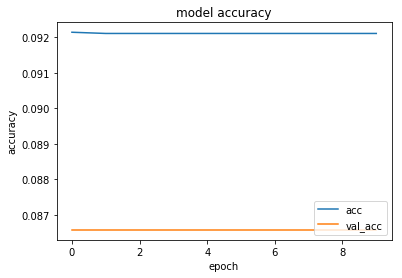

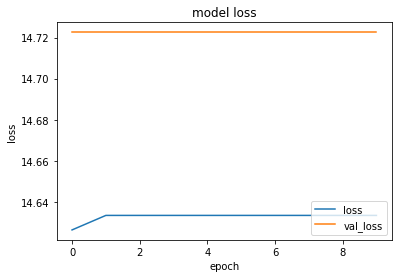

In [19]:
model.plot_history()

In [20]:
from keras.layers import Input, Dense,Add
from keras.models import Model
from tools.models import KerasClassifierInterface

class NormalMLP(KerasClassifierInterface):

    def __init__(self, result_dir, input_dim, output_dim, layers_num=3,trained_epochs=0,
                 med_dim=300, activation="relu",
                 loss='categorical_crossentropy', optimizer='rmsprop'):

        self.input_dim = input_dim
        self.med_dim = med_dim
        self.output_dim = output_dim
        self.activation = activation
        self.layers_num = layers_num
        super().__init__(trained_epochs, result_dir, loss, optimizer)

    def construct(self):
        inputs = Input(shape=(self.input_dim,))
        x = Dense(self.med_dim, activation=self.activation)(inputs)
        
        for _ in range(self.layers_num):
            x = Dense(self.med_dim, activation=self.activation)(x)
            
        predictions = Dense(self.output_dim, activation='softmax')(x)
        model = Model(inputs=inputs, outputs=predictions)
        model.compile(optimizer=self.optimizer,loss=self.loss, metrics=self.metrics)
        return model

    def create_flag(self):
        return f"normalmlpc_{self.layers_num}_{self.input_dim}_{self.med_dim}__{self.output_dim}_{self.activation}"


In [21]:
model=NormalMLP(result_dir=RESULT_DIR,input_dim=784,output_dim=10,layers_num=10,trained_epochs=10)

INFO:root:Not found such a trained model.
INFO:root:Creating new model...
INFO:root:Finished.


In [22]:
model.fit(X_train,y_train,epochs=10,batch_size=BATCH_SIZE,valid_rate=VALID_RATE)

Train on 29399 samples, validate on 12601 samples
Epoch 1/10
29399/29399 [==============================] - 13s 438us/step - loss: 0.7421 - acc: 0.7553 - val_loss: 0.5050 - val_acc: 0.8103
Epoch 2/10
29399/29399 [==============================] - 12s 407us/step - loss: 0.2453 - acc: 0.9419 - val_loss: 0.2272 - val_acc: 0.9471
Epoch 3/10
29399/29399 [==============================] - 12s 407us/step - loss: 0.1734 - acc: 0.9580 - val_loss: 0.2401 - val_acc: 0.9389
Epoch 4/10
29399/29399 [==============================] - 12s 413us/step - loss: 0.1334 - acc: 0.9687 - val_loss: 0.3345 - val_acc: 0.9388
Epoch 5/10
29399/29399 [==============================] - 12s 406us/step - loss: 0.1197 - acc: 0.9719 - val_loss: 0.1578 - val_acc: 0.9685
Epoch 6/10
29399/29399 [==============================] - 12s 407us/step - loss: 0.1032 - acc: 0.9780 - val_loss: 0.1509 - val_acc: 0.9684
Epoch 7/10
29399/29399 [==============================] - 12s 411us/step - loss: 0.0940 - acc: 0.9790 - val_loss: 0.

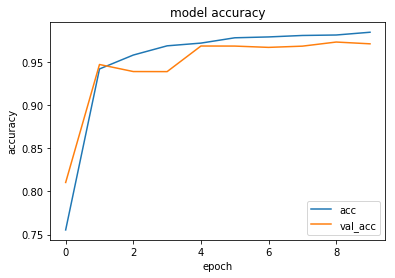

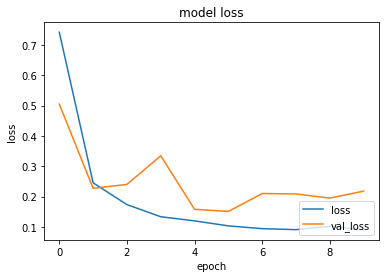

In [23]:
model.plot_history()